Natural Language Processing


https://huggingface.co/transformers/usage.html




In [1]:
!pip install transformers

A sentiment analysis system for text analysis combines natural language processing (NLP) and machine learning techniques to assign weighted sentiment scores to the entities, topics, themes and categories within a sentence or phrase.

These technologies can be used for sentiment analysis:

- BERT
- Spacy
- NLTK
- textblob


In [2]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")
print(nlp("I hate you"))
print(nlp("I love you"))

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]
[{'label': 'POSITIVE', 'score': 0.9998656511306763}]


In [3]:
txt = """

Bill Gates, in full William Henry Gates III, (born October 28, 1955, Seattle, Washington, U.S.), American computer programmer and entrepreneur who cofounded Microsoft Corporation, the world’s largest personal-computer software company.

"""

print(nlp(txt))




[{'label': 'POSITIVE', 'score': 0.9989928603172302}]


In [4]:
txt = """

It’s great to be back in Greenville with so many proud North Carolina Patriots who love our country, support our military, respect our police, honor our flag and always put America first. We don’t put America second. As we gather tonight, our country is being destroyed before our very own eyes. Crime is exploding. Police departments are being ripped apart and defunded. Can you believe that? Is that good politics, defund our police? Number one, it’s bad for our country, but think of it, defund our police. You know, I’ve long said they’re vicious, they’re violent. They in many cases, hate our country and they have bad policy. Now, the bad news from our standpoint, they stick together. They don’t have some of the people like we have where they go on their own and they do what they have to. They stick together, and that’s the one thing they have. They stick together, but their policy is so bad.


"""

print(nlp(txt))


[{'label': 'NEGATIVE', 'score': 0.9950253963470459}]


In [5]:
txt = """

And they stopped it. Now I understand they’re starting it again. That one was just too easy, but wait till they find out, hey, wait till they see what those contractors are going to do to them. Well this is going to cost us five times more money now because we weren’t prepared. It’s the old story. They’re the greatest negotiators in the world. They may not have gone to the greatest business schools, but they’re the greatest negotiators. But we negotiated historic agreements with Mexico, Honduras, Guatemala, El Salvador, to stop illegal immigration. We ended asylum and asylum fraud. The fraud of what was going on at our border was unbelievable. We instituted rapid removals on the border and that’s really rapid. I call it one day turnaround of criminals coming into our country, sending people home in record time. We have times that nobody ever heard of before. We ended catch and release.



"""

print(nlp(txt))


[{'label': 'POSITIVE', 'score': 0.9821214079856873}]


In [6]:
txt = """
a cup of water!
"""

print(nlp(txt))


[{'label': 'POSITIVE', 'score': 0.9983187317848206}]


In [7]:
txt = """
dirty clothes!
"""

print(nlp(txt))


[{'label': 'NEGATIVE', 'score': 0.9987608790397644}]


In [8]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diegoortizmatajira\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\diegoortizmatajira\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\diegoortizmatajira\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package brown is already up-to-date!


True

In [9]:
from textblob import TextBlob

text = '''
And they stopped it. Now I understand they’re starting it again. That one was just too easy, but wait till they find out, hey, wait till they see what those contractors are going to do to them. Well this is going to cost us five times more money now because we weren’t prepared. It’s the old story. They’re the greatest negotiators in the world. They may not have gone to the greatest business schools, but they’re the greatest negotiators. But we negotiated historic agreements with Mexico, Honduras, Guatemala, El Salvador, to stop illegal immigration. We ended asylum and asylum fraud. The fraud of what was going on at our border was unbelievable. We instituted rapid removals on the border and that’s really rapid. I call it one day turnaround of criminals coming into our country, sending people home in record time. We have times that nobody ever heard of before. We ended catch and release.
'''
blob = TextBlob(text)
print(blob.sentiment.polarity)



0.31666666666666665


In [10]:
text = '''
a cup
'''
blob = TextBlob(text)
print(blob.sentiment.polarity)


0.0


In [11]:
text = '''
a white cup
'''
blob = TextBlob(text)
print(blob.sentiment.polarity)


0.0


Reference to textblob:

https://textblob.readthedocs.io/en/dev/quickstart.html


In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

paraphrase = tokenizer.encode_plus(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer.encode_plus(sequence_0, sequence_1, return_tensors="pt")

paraphrase_classification_logits = model(**paraphrase)[0]
not_paraphrase_classification_logits = model(**not_paraphrase)[0]

paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

print("Should be paraphrase")
for i in range(len(classes)):
    print(f"{classes[i]}: {round(paraphrase_results[i] * 100)}%")

# print("\nShould not be paraphrase")
# for i in range(len(classes)):
#     print(f"{classes[i]}: {round(not_paraphrase_results[i] * 100)}%")

ModuleNotFoundError: No module named 'torch'

In [ ]:
print("Should be paraphrase")
for i in range(len(classes)):
    print(f"{classes[i]}: {round(paraphrase_results[i] * 100)}%")

Should be paraphrase
not paraphrase: 10%
is paraphrase: 90%


In [ ]:
from transformers import pipeline

nlp = pipeline("question-answering")

context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))


{'score': 0.6222442984580994, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.5115318894386292, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}


In [ ]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))

{'score': 0.6222442984580994, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.5115318894386292, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}


In [ ]:
context = r"""
We played volleyball in Toronto. 
"""

print(nlp(question="What is the capital of Canada?", context=context))


{'score': 0.9964694976806641, 'start': 25, 'end': 32, 'answer': 'Toronto'}


In [ ]:
context = r"""
We played volleyball in Toronto. 
"""

print(nlp(question="What is your education?", context=context))


{'score': 0.787042498588562, 'start': 11, 'end': 21, 'answer': 'volleyball'}


In [ ]:
context = r"""
Because if Mike Pence does the right thing, we win the election. All he has to do, all this is, this is from the number one, or certainly one of the top, Constitutional lawyers in our country. He has the absolute right to do it. We’re supposed to protect our country, support our country, support our Constitution, and protect our constitution.

States want to revote. The states got defrauded, They were given false information. They voted on it. Now they want to recertify. They want it back. All Vice President Pence has to do is send it back to the states to recertify and we become president and you are the happiest people.

And I actually, I just spoke to Mike. I said: “Mike, that doesn’t take courage. What takes courage is to do nothing. That takes courage.” And then we’re stuck with a president who lost the election by a lot and we have to live with that for four more years. We’re just not going to let that happen.

Many of you have traveled from all across the nation to be here, and I want to thank you for the extraordinary love. That’s what it is. There’s never been a movement like this, ever, ever. For the extraordinary love for this amazing country, and this amazing movement, thank you.

(Audience chants: “We love Trump.”)

By the way, this goes all the way back past the Washington Monument. You believe this? Look at this. That is. Unfortunately gave, they gave the press the prime seats. I can’t stand that.

No. But you look at that behind. I wish they’d flip those cameras and look behind you. That is the most amazing sight. When they make a mistake, you get to see it on television. Amazing. Amazing. All the way back.

And don’t worry, we will not take the name off the Washington Monument. We will not cancel culture.

You know they wanted to get rid of the Jefferson Memorial. Either take it down or just put somebody else in there. I don’t think that’s going to happen. It damn well better not. Although, with this administration, if this happens, it could happen. You’ll see some really bad things happen.

They’ll knock out Lincoln too, by the way. They’ve been taking his statue down. But then we signed a little law. You hurt our monuments, you hurt our heroes, you go to jail for 10 years, and everything stopped. You notice that? It stopped. It all stopped.

And they could use Rudy back in New York City. Rudy. They could use you. Your city’s going to hell. They want Rudy Giuliani back in New York. We’ll get a little younger version of Rudy. Is that OK, Rudy?

We’re gathered together in the heart of our nation’s capital for one very, very basic and simple reason: To save our democracy.
"""

print(nlp(question="What happened in New York City?", context=context))


{'score': 0.04388198256492615, 'start': 2375, 'end': 2400, 'answer': 'Your city’s going to hell'}


In [ ]:
!pip install transformers
!pip install datasets


In [ ]:
from datasets import load_dataset
train_ds = load_dataset("imdb", split="train")
test_ds = load_dataset("imdb", split="test")

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/4ea52f2e58a08dbc12c2bd52d0d92b30b88c00230b4522801b3636782f625c5b)
Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/4ea52f2e58a08dbc12c2bd52d0d92b30b88c00230b4522801b3636782f625c5b)


In [ ]:
train_ds_xdata = train_ds["text"]
train_ds_ydata = train_ds["label"]

test_ds_xdata = test_ds["text"]
test_ds_ydata = test_ds["label"]



In [ ]:
train_ds_xdata1 = train_ds_xdata[0:100]
train_ds_xdata2 = train_ds_xdata[-100:]

train_ds_ydata1 = train_ds_ydata[0:100]
train_ds_ydata2 = train_ds_ydata[-100:]

test_ds_xdata1 = train_ds_xdata[0:100]
test_ds_xdata2 = train_ds_xdata[-100:]

test_ds_ydata1 = train_ds_ydata[0:100]
test_ds_ydata2 = train_ds_ydata[-100:]


train_ds_xdata = train_ds_xdata1 + train_ds_xdata2 + test_ds_xdata1 + test_ds_xdata2
train_ds_ydata = train_ds_ydata1 + train_ds_ydata2 + test_ds_ydata1 + test_ds_ydata2

len(train_ds_xdata)

len(train_ds_ydata)

400

In [ ]:
train_ds_ydata[0:2]

[1, 1]

In [ ]:
from transformers import  BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


In [ ]:
import torch
device = torch.device("cuda:0")


In [ ]:
MAX_LEN = 256

def tokenize_and_trim(sent):
  tokens = tokenizer.tokenize(sent)
  return tokens[:MAX_LEN - 1] + [tokens[-1]]

tokenized_texts = [tokenize_and_trim(sent) for sent in train_ds_xdata]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]



Tokenize the first sentence:
['bro', '##m', '##well', 'high', 'is', 'a', 'cartoon', 'comedy', '.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', ',', 'such', 'as', '"', 'teachers', '"', '.', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bro', '##m', '##well', 'high', "'", 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"', 'teachers', '"', '.', 'the', 'scramble', 'to', 'survive', 'financially', ',', 'the', 'insight', '##ful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', "'", 'po', '##mp', ',', 'the', 'pet', '##tine', '##ss', 'of', 'the', 'whole', 'situation', ',', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', '.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', ',', 'i', 'immediately', 'rec

In [ ]:
from keras.preprocessing.sequence import pad_sequences
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
from sklearn.model_selection import train_test_split


attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)


train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, train_ds_ydata, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)




train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)



In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

     |████████████████████████████████| 133kB 26.0MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 804.1MB 23kB/s 
     |████████████████████████████████| 133kB 53.8MB/s 
     |████████████████████████████████| 7.6MB 41.8MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: botocore 1.20.89 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification

batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.cuda()


param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

t_total value of -1 results in schedule not being applied


In [ ]:
from tqdm import tqdm, trange
import numpy as np


# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))



Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.5962921730850054



Epoch:  25%|██▌       | 1/4 [00:20<01:02, 20.87s/it]

Validation Accuracy: 0.6041666666666666
Train loss: 0.5034953699163769



Epoch:  50%|█████     | 2/4 [00:42<00:42, 21.08s/it]

Validation Accuracy: 0.875
Train loss: 0.2554664712237275



Epoch:  75%|███████▌  | 3/4 [01:03<00:21, 21.22s/it]

Validation Accuracy: 0.9791666666666666
Train loss: 0.13068072554533897



Epoch: 100%|██████████| 4/4 [01:25<00:00, 21.26s/it]

Validation Accuracy: 0.9583333333333334


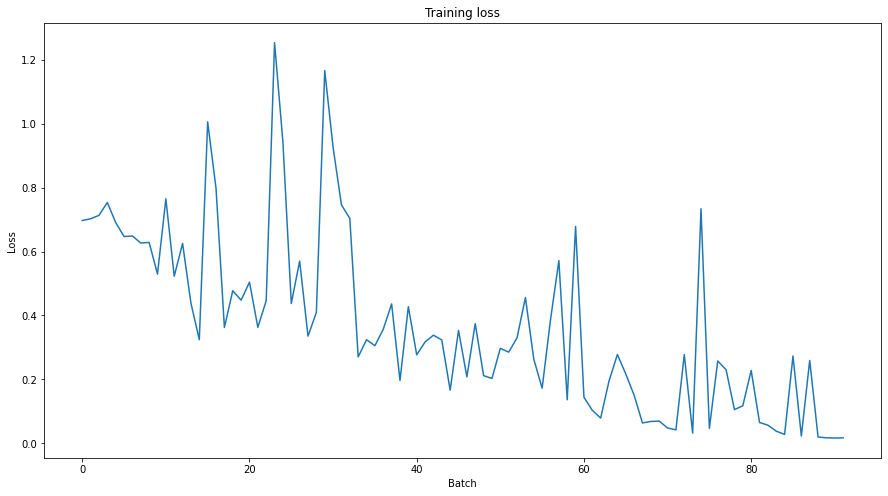

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
sentences = train_ds_xdata[0:2]

sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_ds_ydata[0:2]
tokenized_texts = [tokenize_and_trim(sent) for sent in sentences]


# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)  

prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


In [ ]:
predictions

[array([[-1.7165858,  1.3696423],
        [-2.2012563,  2.1493664]], dtype=float32)]